<a href="https://colab.research.google.com/github/AbidYousuf/Abid-Yousuf/blob/main/Earlystopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

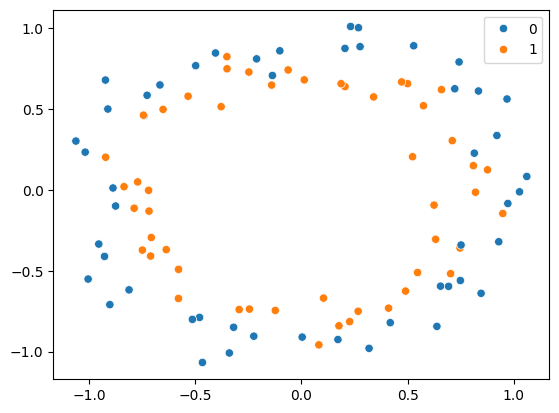

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

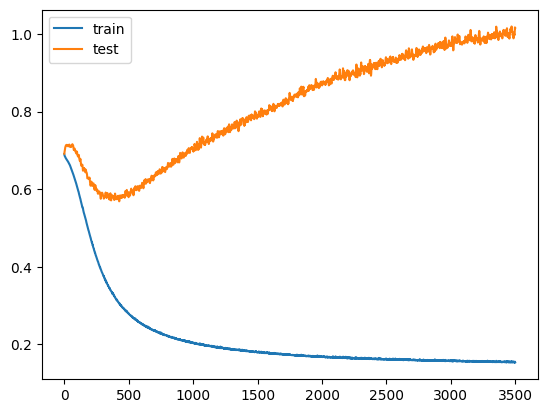

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()



9600/9600 [==============================] - 14s 1ms/step


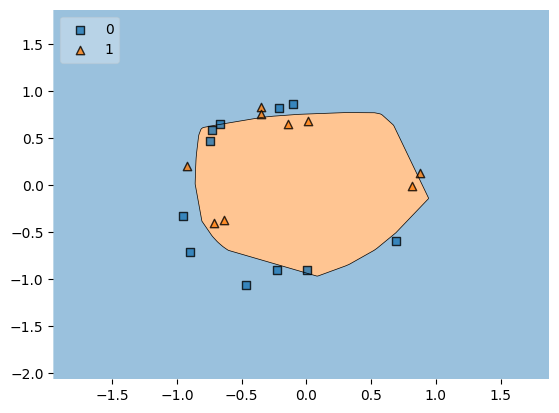

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

**Early Stopping**

In [ ]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=callback,epochs=3500)

Epoch 1/3500
3/3 [==============================] - 2s 141ms/step - loss: 0.6953 - accuracy: 0.4625 - val_loss: 0.6851 - val_accuracy: 0.6000
Epoch 2/3500
3/3 [==============================] - 0s 31ms/step - loss: 0.6927 - accuracy: 0.4625 - val_loss: 0.6868 - val_accuracy: 0.6000
Epoch 3/3500
3/3 [==============================] - 0s 27ms/step - loss: 0.6911 - accuracy: 0.4750 - val_loss: 0.6889 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 111ms/step - loss: 0.6897 - accuracy: 0.5250 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 5/3500
3/3 [==============================] - 0s 75ms/step - loss: 0.6885 - accuracy: 0.5125 - val_loss: 0.6916 - val_accuracy: 0.5500
Epoch 6/3500
3/3 [==============================] - 0s 78ms/step - loss: 0.6879 - accuracy: 0.5375 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 7/3500
3/3 [==============================] - 0s 92ms/step - loss: 0.6869 - accuracy: 0.5375 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 8/350

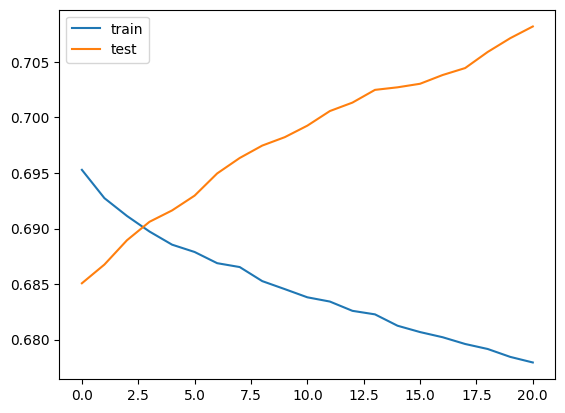

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

9600/9600 [==============================] - 15s 2ms/step


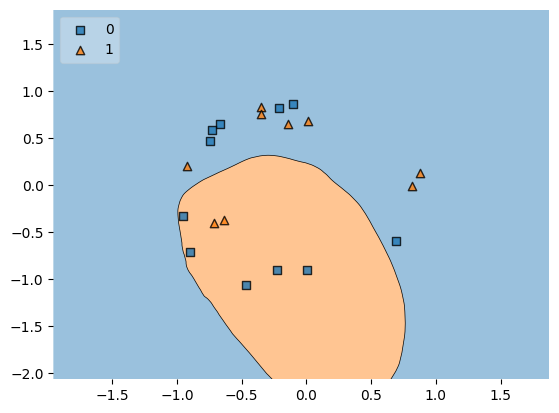

In [ ]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()